## This notebook describes how to extract taxonomy information starting from an NCBI taxid, and describes how that information was used to plot a bar chart and make phylogenetic tree visualizations for our set of repeat expansion protein homologs 



In [4]:
#Load all of the packages required to run this notebook

if (!requireNamespace("pacman", quietly = TRUE))
    install.packages("pacman")

pacman::p_load("magrittr")
pacman::p_load("tidyverse")



### How to pull out desired taxonomic lineage information starting from NCBI taxid's

### Pull and format taxonomy lookup table from NCBI

In [5]:
# Pull out the rankedlineage.dmp file from the new_taxdump directory at NCBI
# This code block uses code adapted from here: https://www.biostars.org/p/317073/

runcmd <- function(cmd, verbose = TRUE) {
    output <- system2(command = cmd, stdout = TRUE, stderr = TRUE, shell = TRUE)
    if (verbose) {
        print(paste("Stdout: ", output[[1]], " Stderr: ", output[[2]]))
    }
}

download.file("https://ftp.ncbi.nlm.nih.gov/pub/taxonomy/new_taxdump/new_taxdump.tar.gz", "new_taxdump.tar.gz", method = "auto")

# Unzipping tar.gz file
untar("new_taxdump.tar.gz", exdir = "./new_taxdump")

# Print the names of the files in the tar
tarfile_list <- untar("new_taxdump.tar.gz", list = TRUE) %>% as.character
print(tarfile_list)

 [1] "citations.dmp"        "delnodes.dmp"         "division.dmp"        
 [4] "excludedfromtype.dmp" "fullnamelineage.dmp"  "gencode.dmp"         
 [7] "host.dmp"             "images.dmp"           "merged.dmp"          
[10] "names.dmp"            "nodes.dmp"            "rankedlineage.dmp"   
[13] "taxidlineage.dmp"     "typematerial.dmp"     "typeoftype.dmp"      


In [6]:
#format the rankedlineage file to make a table that has taxid with corresponding lineage
# This code block uses code from here: https://www.biostars.org/p/317073/
tax <- read_tsv("rankedlineage.dmp", 
         col_names = c("id", "name", "s", "g", "f", "o", "c","p", "k", "d"), 
         col_types=("i-c-c-c-c-c-c-c-c-c-"))

table1 <- gather(tax, "key", "value", 2:10) %>%
         filter(!is.na(value)) %>% 
          unite(2:3, col="name", sep="=") 
table1
tax2 <-  group_by(table1, id) %>% 
      summarize(lineage= paste(name, collapse="; "))
tax2

id      name                                             
1              1 name=root                                        
2         131567 name=cellular organisms                          
3           2157 name=Archaea                                     
4        1935183 name=Asgard group                                
5        2798909 name=Candidatus Baldrarchaeota                   
6        2798916 name=Candidatus Baldrarchaeia                    
7        2798922 name=Candidatus Baldrarchaeales                  
8        2798928 name=Candidatus Baldrarchaeaceae                 
9        2798934 name=Candidatus Baldrarchaeum                    
10       2798940 name=Candidatus Baldrarchaeum yapensis           
11       2799004 name=unclassified Candidatus Baldrarchaeota      
12       2799005 name=Candidatus Baldrarchaeota archaeon          
13       2798908 name=Candidatus Borrarchaeota                    
14       2798915 name=Candidatus Borrarchaeia                     
15       2798921 name=Candidatus Borrarchaeales                   
16       2798927 name=Candidatus Borrarchaeaceae                  
17       2798933 name=Candidatus Borrarchaeum                     
18       2848170 name=Candidatus Borrarchaeum weybense            
19       2798939 name=Candidatus Borrarchaeum yapensis            
20       2841639 name=unclassified Candidatus Borrarchaeum        
21       2841640 name=Candidatus Borrachaaeum sp. lw60_2018_gm2_56
22       2846742 name=Candidatus Borrarchaeum sp.                 
23       2799002 name=unclassified Candidatus Borrarchaeota       
24       2799003 name=Candidatus Borrarchaeota archaeon           
25       2827219 name=Candidatus Freyarchaeota                    
26       3036974 name=Candidatus Freyrarchaeia                    
27       3036975 name=Candidatus Freyrarchaeales                  
28       3036976 name=Candidatus Freyrarchaeaceae                 
29       3036977 name=Candidatus Freyrarchaeum                    
30       3036978 name=Candidatus Freyrarchaeum guaymaensis        
⋮        ⋮       ⋮                                                
18168018 1198333 d=Viruses                                        
18168019 1416629 d=Viruses                                        
18168020 1414770 d=Viruses                                        
18168021 1198330 d=Viruses                                        
18168022 1416630 d=Viruses                                        
18168023 1414768 d=Viruses                                        
18168024 1414769 d=Viruses                                        
18168025 1419328 d=Viruses                                        
18168026 1732297 d=Viruses                                        
18168027 2042532 d=Viruses                                        
18168028 1960247 d=Viruses                                        
18168029  398817 d=Viruses                                        
18168030 2042530 d=Viruses                                        
18168031  239364 d=Viruses                                        
18168032 2115881 d=Viruses                                        
18168033  375198 d=Viruses                                        
18168034  186617 d=Viruses                                        
18168035 1868660 d=Viruses                                        
18168036 1075823 d=Viruses                                        
18168037  381900 d=Viruses                                        
18168038  381901 d=Viruses                                        
18168039  340016 d=Viruses                                        
18168040 1448990 d=Viruses                                        
18168041 1448985 d=Viruses                                        
18168042 1448988 d=Viruses                                        
18168043 1450698 d=Viruses                                        
18168044 1448991 d=Viruses                                        
18168045 1448989 d=Viruses                              

id     
1        1     
2        2     
3        6     
4        7     
5        9     
6       10     
7       11     
8       13     
9       14     
10      16     
11      17     
12      18     
13      19     
14      20     
15      21     
16      22     
17      23     
18      24     
19      25     
20      27     
21      28     
22      29     
23      31     
24      32     
25      33     
26      34     
27      35     
28      38     
29      39     
30      40     
⋮       ⋮      
2513318 3057456
2513319 3057457
2513320 3057458
2513321 3057459
2513322 3057460
2513323 3057461
2513324 3057462
2513325 3057463
2513326 3057464
2513327 3057465
2513328 3057466
2513329 3057467
2513330 3057468
2513331 3057469
2513332 3057470
2513333 3057471
2513334 3057472
2513335 3057473
2513336 3057474
2513337 3057475
2513338 3057476
2513339 3057477
2513340 3057582
2513341 3057583
2513342 3057584
2513343 3057585
2513344 3057586
2513345 3057590
2513346 3057661
2513347 3057985
        lineage                                                                                                                                                 
1       name=root                                                                                                                                               
2       name=Bacteria                                                                                                                                           
3       name=Azorhizobium; f=Xanthobacteraceae; o=Hyphomicrobiales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria                                         
4       name=Azorhizobium caulinodans; g=Azorhizobium; f=Xanthobacteraceae; o=Hyphomicrobiales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria             
5       name=Buchnera aphidicola; g=Buchnera; f=Erwiniaceae; o=Enterobacterales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                            
6       name=Cellvibrio; f=Cellvibrionaceae; o=Cellvibrionales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                                             
7       name=Cellulomonas gilvus; g=Cellulomonas; f=Cellulomonadaceae; o=Micrococcales; c=Actinomycetes; p=Actinomycetota; d=Bacteria                           
8       name=Dictyoglomus; f=Dictyoglomaceae; o=Dictyoglomales; c=Dictyoglomia; p=Dictyoglomota; d=Bacteria                                                     
9       name=Dictyoglomus thermophilum; g=Dictyoglomus; f=Dictyoglomaceae; o=Dictyoglomales; c=Dictyoglomia; p=Dictyoglomota; d=Bacteria                        
10      name=Methylophilus; f=Methylophilaceae; o=Nitrosomonadales; c=Betaproteobacteria; p=Pseudomonadota; d=Bacteria                                          
11      name=Methylophilus methylotrophus; g=Methylophilus; f=Methylophilaceae; o=Nitrosomonadales; c=Betaproteobacteria; p=Pseudomonadota; d=Bacteria          
12      name=Pelobacter; f=Desulfuromonadaceae; o=Desulfuromonadales; c=Desulfuromonadia; p=Thermodesulfobacteriota; d=Bacteria                                 
13      name=Syntrophotalea carbinolica; g=Syntrophotalea; f=Syntrophotaleaceae; o=Desulfuromonadales; c=Desulfuromonadia; p=Thermodesulfobacteriota; d=Bacteria
14      name=Phenylobacterium; f=Caulobacteraceae; o=Caulobacterales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria                                       
15      name=Phenylobacterium immobile; g=Phenylobacterium; f=Caulobacteraceae; o=Caulobacterales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria          
16      name=Shewanella; f=Shewanellaceae; o=Alteromonadales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                                               
17      name=Shewanella colwelliana; g=Shewanella; f=Shewanellaceae; o=Alteromonadales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                     
18      name=Shewanella putrefaciens; g=Shewanella; f=Shewanellaceae; o=Alteromonadales; c=Gammaproteobacteria; p=Pseu

### Read in tables of interest and add lineage information that corresponds to taxid's of interest

In [80]:
#the input tables for the full set of results can be pulled from Zenodo DOI: 10.5281/zenodo.8180704
#you can download these tables to your directory or pull them directly using inoborutils

#download the data from zenodo
#library(inborutils)
#doi <- "10.5281/zenodo.8180704"
#local_path <- "./"
#inborutils::download_zenodo(doi, local_path, quiet = TRUE)
#list.files(local_path)

In [2]:
plot_df=read.csv('blasthits072123.csv') #table with blast hits. Zenodo DOI: 10.5281/zenodo.8180704
plot_df=plot_df[,c(4,10,11)] #take columns of interest
new_df=read.csv('foldseekhits072123.csv') #table with foldseek hits .Zenodo DOI: 10.5281/zenodo.8180704
new_df$reference <- gsub("_.*", "", new_df$reference) #change query gene names to be compatible with the blast names
new_df=new_df[,c(1,2,7)]#take columns of interest
colnames(new_df)=c('gene','Accession','id')#change column names to match across tables
new_df$gene <- sub("c9orf72", "C9orf72", new_df$gene)#change query gene names to be compatible with the blast names

# Merge the dataframes
merged_df <- rbind(plot_df, new_df)
# Keep only unique rows
merged_df <- unique(merged_df)
merged_df #table of full set of Foldseek hits plus blast hits for query dRE proteins. Only 19 proteins were analyzed with Foldseek.


id      Accession      gene  
1         9606 NP_000135.2    FXN   
2         9606 AAA98508.1     FXN   
3         9598 XP_016816418.1 FXN   
4         9595 XP_004048150.1 FXN   
5         9597 XP_003824802.2 FXN   
6         9590 XP_055150380.1 FXN   
7         9600 XP_054357544.1 FXN   
8        60711 XP_007967621.1 FXN   
9        61622 XP_010361265.1 FXN   
10        9555 XP_003911830.1 FXN   
11        9531 XP_011912045.1 FXN   
12       54180 XP_033093041.1 FXN   
13       61621 XP_017728538.1 FXN   
14        9565 XP_025215796.1 FXN   
15        9544 NP_001247670.1 FXN   
16      591936 XP_023069006.2 FXN   
17        9541 Q8HXX9.2       FXN   
18        9541 BAC20589.1     FXN   
19     2715852 XP_017398922.1 FXN   
20       39432 XP_039317470.1 FXN   
21        9515 XP_032146839.1 FXN   
22       39432 XP_003941591.2 FXN   
23        9483 XP_035158805.1 FXN   
24        9544 EHH24154.1     FXN   
25        9606 5KZ5_A         FXN   
26        9470 XP_053430534.1 FXN   
27       30611 XP_003783094.1 FXN   
28     1230840 XP_007942528.1 FXN   
29        9606 NP_852090.1    FXN   
30        9606 AAA98509.1     FXN   
⋮      ⋮       ⋮              ⋮     
286881  419612 S9X9E2         ATXN10
286882 1156394 T0RI50         ATXN10
286883   32264 T1JVS2         ATXN10
286884   32264 T1K8K0         ATXN10
286885    6087 T2M4A5         ATXN10
286886    8840 U3ISD6         ATXN10
286887   59894 U3JJK9         ATXN10
286888  225164 V3ZW41         ATXN10
286889   72664 V4MJ03         ATXN10
286890   85681 V4SDK7         ATXN10
286891    3885 V7BRV4         ATXN10
286892    3885 V7BUL9         ATXN10
286893    3885 V7BVY9         ATXN10
286894    8665 V8NNI1         ATXN10
286895 1317065 V9ECN3         ATXN10
286896 1317065 V9EDB1         ATXN10
286897   13333 W1PT42         ATXN10
286898  871575 W1QEY8         ATXN10
286899    4792 W2KFC6         ATXN10
286900    4792 W2MKU3         ATXN10
286901  761204 W2PNC2         ATXN10
286902  761204 W2PP19         ATXN10
286903 1317064 W2YID2         ATXN10
286904 1317064 W2YKS1         ATXN10
286905  112090 W4FJJ6         ATXN10
286906    7918 W5NK81         ATXN10
286907    7998 W5UH68         ATXN10
286908 1382522 W6MN89         ATXN10
286909 1043628 W7HT01         ATXN10
286910  981085 W9R1D0         ATXN10

In [7]:


#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% merged_df$id)
joined=left_join(merged_df, lineage, by = "id")   
joined

#extract the taxonomic class of each taxid from the full lineage. Chose to expand different levels of taxonomy based on overall patterns observed in order to be reasonable for visualization.
#the regular expressions here can be changed to extract whatever level of information you want from the full lineage

#pull order name for Carnivora & Artiodactyla matches 
extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "o=(Carnivora|Artiodactyla)")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=o=)[^;]+")
  }
  
  return(result)
}

# Apply the function to the joined$lineage column
x <- extract_pattern(joined$lineage)



#if not in order Carnivora & Artiodactyla, pull Mammalia for things in Mammalia
extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "c=(Mammalia)")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=c=)[^;]+")
  }
  
  return(result)
}

# Apply the function to the joined$lineage column
x <- ifelse(is.na(x), extract_pattern(joined$lineage), x)



#if not in order Carnivora & Artiodactyla, or class Mammalia,pull classes for things in Aves or Actinopteri
extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "c=(Aves|Actinopteri)")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=c=)[^;]+")
  }
  
  return(result)
}

x <- ifelse(is.na(x), extract_pattern(joined$lineage), x)



#if not in any of the above, pull the domain or kingdom

x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Archaea"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Fungi"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Metazoa"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Viridiplantae"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Bacteria"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Viruses"), x)

#Specially extract Sar group organisms that don't get labeled Sar automatically
# List of patterns
patterns <- c("p=Apicomplexa","p=Ciliophora","f=Colpodellaceae","o=Colponemida","c=Dinophyceae","g=Loeffela","p=Perkinsozoa","o=Aquavolonida","p=Cercozoa","p=Endomyxa","c=Actinophryidae","c=Bigyra","c=Chrysista","c=Chrysomerophyceae","c=Developea","c=Hyphochytriomycetes","o=Pirsoniales","p=Bacillariophyta","c=Bolidophyceae","c=Chrysophyceae","c=Dictyochophyceae","c=Eustigmatophyceae","c=Olisthodiscophyceae","c=Pelagophyceae","f=Picophagaceae","c=Pinguiophyceae","c=Raphidophyceae","c=Synchromophyceae","c=Synurophyceae")

# Create a regular expression that matches any of the patterns
pattern <- paste(patterns, collapse = "|")

# Extract the pattern from each string
extracted <- str_extract(joined$lineage, pattern)

# If a pattern is extracted, return 'SAR'; otherwise, return the original value
x <- ifelse(!is.na(extracted), "SAR", x)
x
#if information does not get pulled out by any of the other things, label as Eukaryote if a eukaryote
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Eukaryota"), x)


#add all the lineage information that was just extracted to the merged_df
bound=cbind(merged_df,x)
bound


id      Accession      gene  
1         9606 NP_000135.2    FXN   
2         9606 AAA98508.1     FXN   
3         9598 XP_016816418.1 FXN   
4         9595 XP_004048150.1 FXN   
5         9597 XP_003824802.2 FXN   
6         9590 XP_055150380.1 FXN   
7         9600 XP_054357544.1 FXN   
8        60711 XP_007967621.1 FXN   
9        61622 XP_010361265.1 FXN   
10        9555 XP_003911830.1 FXN   
11        9531 XP_011912045.1 FXN   
12       54180 XP_033093041.1 FXN   
13       61621 XP_017728538.1 FXN   
14        9565 XP_025215796.1 FXN   
15        9544 NP_001247670.1 FXN   
16      591936 XP_023069006.2 FXN   
17        9541 Q8HXX9.2       FXN   
18        9541 BAC20589.1     FXN   
19     2715852 XP_017398922.1 FXN   
20       39432 XP_039317470.1 FXN   
21        9515 XP_032146839.1 FXN   
22       39432 XP_003941591.2 FXN   
23        9483 XP_035158805.1 FXN   
24        9544 EHH24154.1     FXN   
25        9606 5KZ5_A         FXN   
26        9470 XP_053430534.1 FXN   
27       30611 XP_003783094.1 FXN   
28     1230840 XP_007942528.1 FXN   
29        9606 NP_852090.1    FXN   
30        9606 AAA98509.1     FXN   
⋮      ⋮       ⋮              ⋮     
281029  419612 S9X9E2         ATXN10
281030 1156394 T0RI50         ATXN10
281031   32264 T1JVS2         ATXN10
281032   32264 T1K8K0         ATXN10
281033    6087 T2M4A5         ATXN10
281034    8840 U3ISD6         ATXN10
281035   59894 U3JJK9         ATXN10
281036  225164 V3ZW41         ATXN10
281037   72664 V4MJ03         ATXN10
281038   85681 V4SDK7         ATXN10
281039    3885 V7BRV4         ATXN10
281040    3885 V7BUL9         ATXN10
281041    3885 V7BVY9         ATXN10
281042    8665 V8NNI1         ATXN10
281043 1317065 V9ECN3         ATXN10
281044 1317065 V9EDB1         ATXN10
281045   13333 W1PT42         ATXN10
281046  871575 W1QEY8         ATXN10
281047    4792 W2KFC6         ATXN10
281048    4792 W2MKU3         ATXN10
281049  761204 W2PNC2         ATXN10
281050  761204 W2PP19         ATXN10
281051 1317064 W2YID2         ATXN10
281052 1317064 W2YKS1         ATXN10
281053  112090 W4FJJ6         ATXN10
281054    7918 W5NK81         ATXN10
281055    7998 W5UH68         ATXN10
281056 1382522 W6MN89         ATXN10
281057 1043628 W7HT01         ATXN10
281058  981085 W9R1D0         ATXN10
       lineage                                                                                                                                                            
1      name=Homo sapiens; g=Homo; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                 
2      name=Homo sapiens; g=Homo; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                 
3      name=Pan troglodytes; g=Pan; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                               
4      name=Gorilla gorilla gorilla; s=Gorilla gorilla; g=Gorilla; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                
5      name=Pan paniscus; g=Pan; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                  
6      name=Symphalangus syndactylus; g=Symphalangus; f=Hylobatidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                           
7      name=Pongo pygmaeus; g=Pongo; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                              
8      name=Chlorocebus sabaeus; g=Chlorocebus; f=Cercopithecidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                             
9      name=Rhinopithecus roxellana; g=Rhinopithecus; f=Cercopithecidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                       
10 

[1] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
    [5] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
    [9] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [13] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [17] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [21] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [25] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [29] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [33] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [37] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [41] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [45] "Mammalia"        "Mammalia"        "Mammalia"        "Carnivora"      
   [49] "Mammalia"        "Mammalia"        "Artiodactyla"    "Artiodactyla"   
   [53] "Carnivora"       "Carnivora"       "Mammalia"        "Mammalia"       
   [57] "Carnivora"       "Mammalia"        "Mammalia"        "Mammalia"       
   [61] "Carnivora"       "Mammalia"        "Carnivora"       "Mammalia"       
   [65] "Mammalia"        "Mammalia"        "Mammalia"        "Carnivora"      
   [69] "Carnivora"       "Mammalia"        "Carnivora"       "Carnivora"      
   [73] "Mammalia"        "Artiodactyla"    "Mammalia"        "Carnivora"      
   [77] "Artiodactyla"    "Mammalia"        "Mammalia"        "Mammalia"       
   [81] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [85] "Artiodactyla"    "Carnivora"       "Mammalia"        "Mammalia"       
   [89] "Carnivora"       "Artiodactyla"    "Mammalia"        "Mammalia"       
   [93] "Carnivora"       "Mammalia"        "Mammalia"        "Carnivora"      
   [97] "Mammalia"        "Carnivora"       "Mammalia"        "Artiodactyla"   
  [101] "Artiodactyla"    "Mammalia"        "Mammalia"        "Mammalia"       
  [105] "Mammalia"        "Artiodactyla"    "Mammalia"        "Mammalia"       
  [109] "Mammalia"        "Artiodactyla"    "Artiodactyla"    "Mammalia"       
  [113] "Carnivora"       "Mammalia"        "Carnivora"       "Mammalia"       
  [117] "Carnivora"       "Artiodactyla"    "Artiodactyla"    "Mammalia"       
  [121] "Mammalia"        "Mammalia"        "Carnivora"       "Mammalia"       
  [125] "Carnivora"       "Mammalia"        "Mammalia"        "Mammalia"       
  [129] "Mammalia"        "Mammalia"        "Mammalia"        "Carnivora"      
  [133] "Mammalia"        "Mammalia"        "Artiodactyla"    "Mammalia"       
  [137] "Carnivora"       "Mammalia"        "Mammalia"        "Mammalia"       
  [141] "Mammalia"        "Artiodactyla"    "Artiodactyla"    "Mammalia"       
  [145] "Artiodactyla"    "Artiodactyla"    "Artiodactyla"    "Artiodactyla"   
  [149] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
  [153] "Artiodactyla"    "Artiodactyla"    "Mammalia"        "Mammalia"       
  [157] "Artiodactyla"    "Mammalia"        "Artiodactyla"    "Mammalia"       
  [161] "Artiodactyla"    "Mammalia"        "Mammalia"        "Artiodactyla"   
  [165] "Mammalia"        "Mammalia"        "Artiodactyla"    "Mammalia"       
  [169] "Carnivora"       "Mammalia"        "Artiodactyla"    "Carnivora"      
  [173] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
  [177] "Carnivora"       "Artiodactyla"    "Artiodactyla"    "Carnivora"      
  [181] "Mammalia"        "Artiodactyla"    "Artiodactyla"    "Mammalia"       
  [185] "Artiodactyla"    "Carnivora"       "Artiodactyla"    "Mammalia"       
  [189] "Mammalia"        "Mammalia"        "Carnivora"       "Artiodactyla"   
  [193] "Carnivora"       "Mammalia"        "Mammalia"        "Artiodactyla"   
  [197] "Mammalia"        "Artiodactyla"    "Carnivora"       "Carnivora"      
  [2

id      Accession      gene   x              
1         9606 NP_000135.2    FXN    Mammalia       
2         9606 AAA98508.1     FXN    Mammalia       
3         9598 XP_016816418.1 FXN    Mammalia       
4         9595 XP_004048150.1 FXN    Mammalia       
5         9597 XP_003824802.2 FXN    Mammalia       
6         9590 XP_055150380.1 FXN    Mammalia       
7         9600 XP_054357544.1 FXN    Mammalia       
8        60711 XP_007967621.1 FXN    Mammalia       
9        61622 XP_010361265.1 FXN    Mammalia       
10        9555 XP_003911830.1 FXN    Mammalia       
11        9531 XP_011912045.1 FXN    Mammalia       
12       54180 XP_033093041.1 FXN    Mammalia       
13       61621 XP_017728538.1 FXN    Mammalia       
14        9565 XP_025215796.1 FXN    Mammalia       
15        9544 NP_001247670.1 FXN    Mammalia       
16      591936 XP_023069006.2 FXN    Mammalia       
17        9541 Q8HXX9.2       FXN    Mammalia       
18        9541 BAC20589.1     FXN    Mammalia       
19     2715852 XP_017398922.1 FXN    Mammalia       
20       39432 XP_039317470.1 FXN    Mammalia       
21        9515 XP_032146839.1 FXN    Mammalia       
22       39432 XP_003941591.2 FXN    Mammalia       
23        9483 XP_035158805.1 FXN    Mammalia       
24        9544 EHH24154.1     FXN    Mammalia       
25        9606 5KZ5_A         FXN    Mammalia       
26        9470 XP_053430534.1 FXN    Mammalia       
27       30611 XP_003783094.1 FXN    Mammalia       
28     1230840 XP_007942528.1 FXN    Mammalia       
29        9606 NP_852090.1    FXN    Mammalia       
30        9606 AAA98509.1     FXN    Mammalia       
⋮      ⋮       ⋮              ⋮      ⋮              
286881  419612 S9X9E2         ATXN10 Artiodactyla   
286882 1156394 T0RI50         ATXN10 d=Eukaryota    
286883   32264 T1JVS2         ATXN10 k=Metazoa      
286884   32264 T1K8K0         ATXN10 k=Metazoa      
286885    6087 T2M4A5         ATXN10 k=Metazoa      
286886    8840 U3ISD6         ATXN10 Aves           
286887   59894 U3JJK9         ATXN10 Aves           
286888  225164 V3ZW41         ATXN10 k=Metazoa      
286889   72664 V4MJ03         ATXN10 k=Viridiplantae
286890   85681 V4SDK7         ATXN10 k=Viridiplantae
286891    3885 V7BRV4         ATXN10 k=Viridiplantae
286892    3885 V7BUL9         ATXN10 k=Viridiplantae
286893    3885 V7BVY9         ATXN10 k=Viridiplantae
286894    8665 V8NNI1         ATXN10 k=Metazoa      
286895 1317065 V9ECN3         ATXN10 d=Eukaryota    
286896 1317065 V9EDB1         ATXN10 d=Eukaryota    
286897   13333 W1PT42         ATXN10 k=Viridiplantae
286898  871575 W1QEY8         ATXN10 k=Fungi        
286899    4792 W2KFC6         ATXN10 d=Eukaryota    
286900    4792 W2MKU3         ATXN10 d=Eukaryota    
286901  761204 W2PNC2         ATXN10 d=Eukaryota    
286902  761204 W2PP19         ATXN10 d=Eukaryota    
286903 1317064 W2YID2         ATXN10 d=Eukaryota    
286904 1317064 W2YKS1         ATXN10 d=Eukaryota    
286905  112090 W4FJJ6         ATXN10 d=Eukaryota    
286906    7918 W5NK81         ATXN10 Actinopteri    
286907    7998 W5UH68         ATXN10 Actinopteri    
286908 1382522 W6MN89         ATXN10 k=Fungi        
286909 1043628 W7HT01         ATXN10 k=Fungi        
286910  981085 W9R1D0         ATXN10 k=Viridiplantae

In [8]:
#figure out if any ids do not have a classification
missing <- bound[is.na(bound[,3]), ]
joined[joined$id %in% missing$id, ]

id Accession gene lineage

#### Plot the results as a bar chart with count of homologs found colored by taxonomy per query gene

Saving 7 x 7 in image


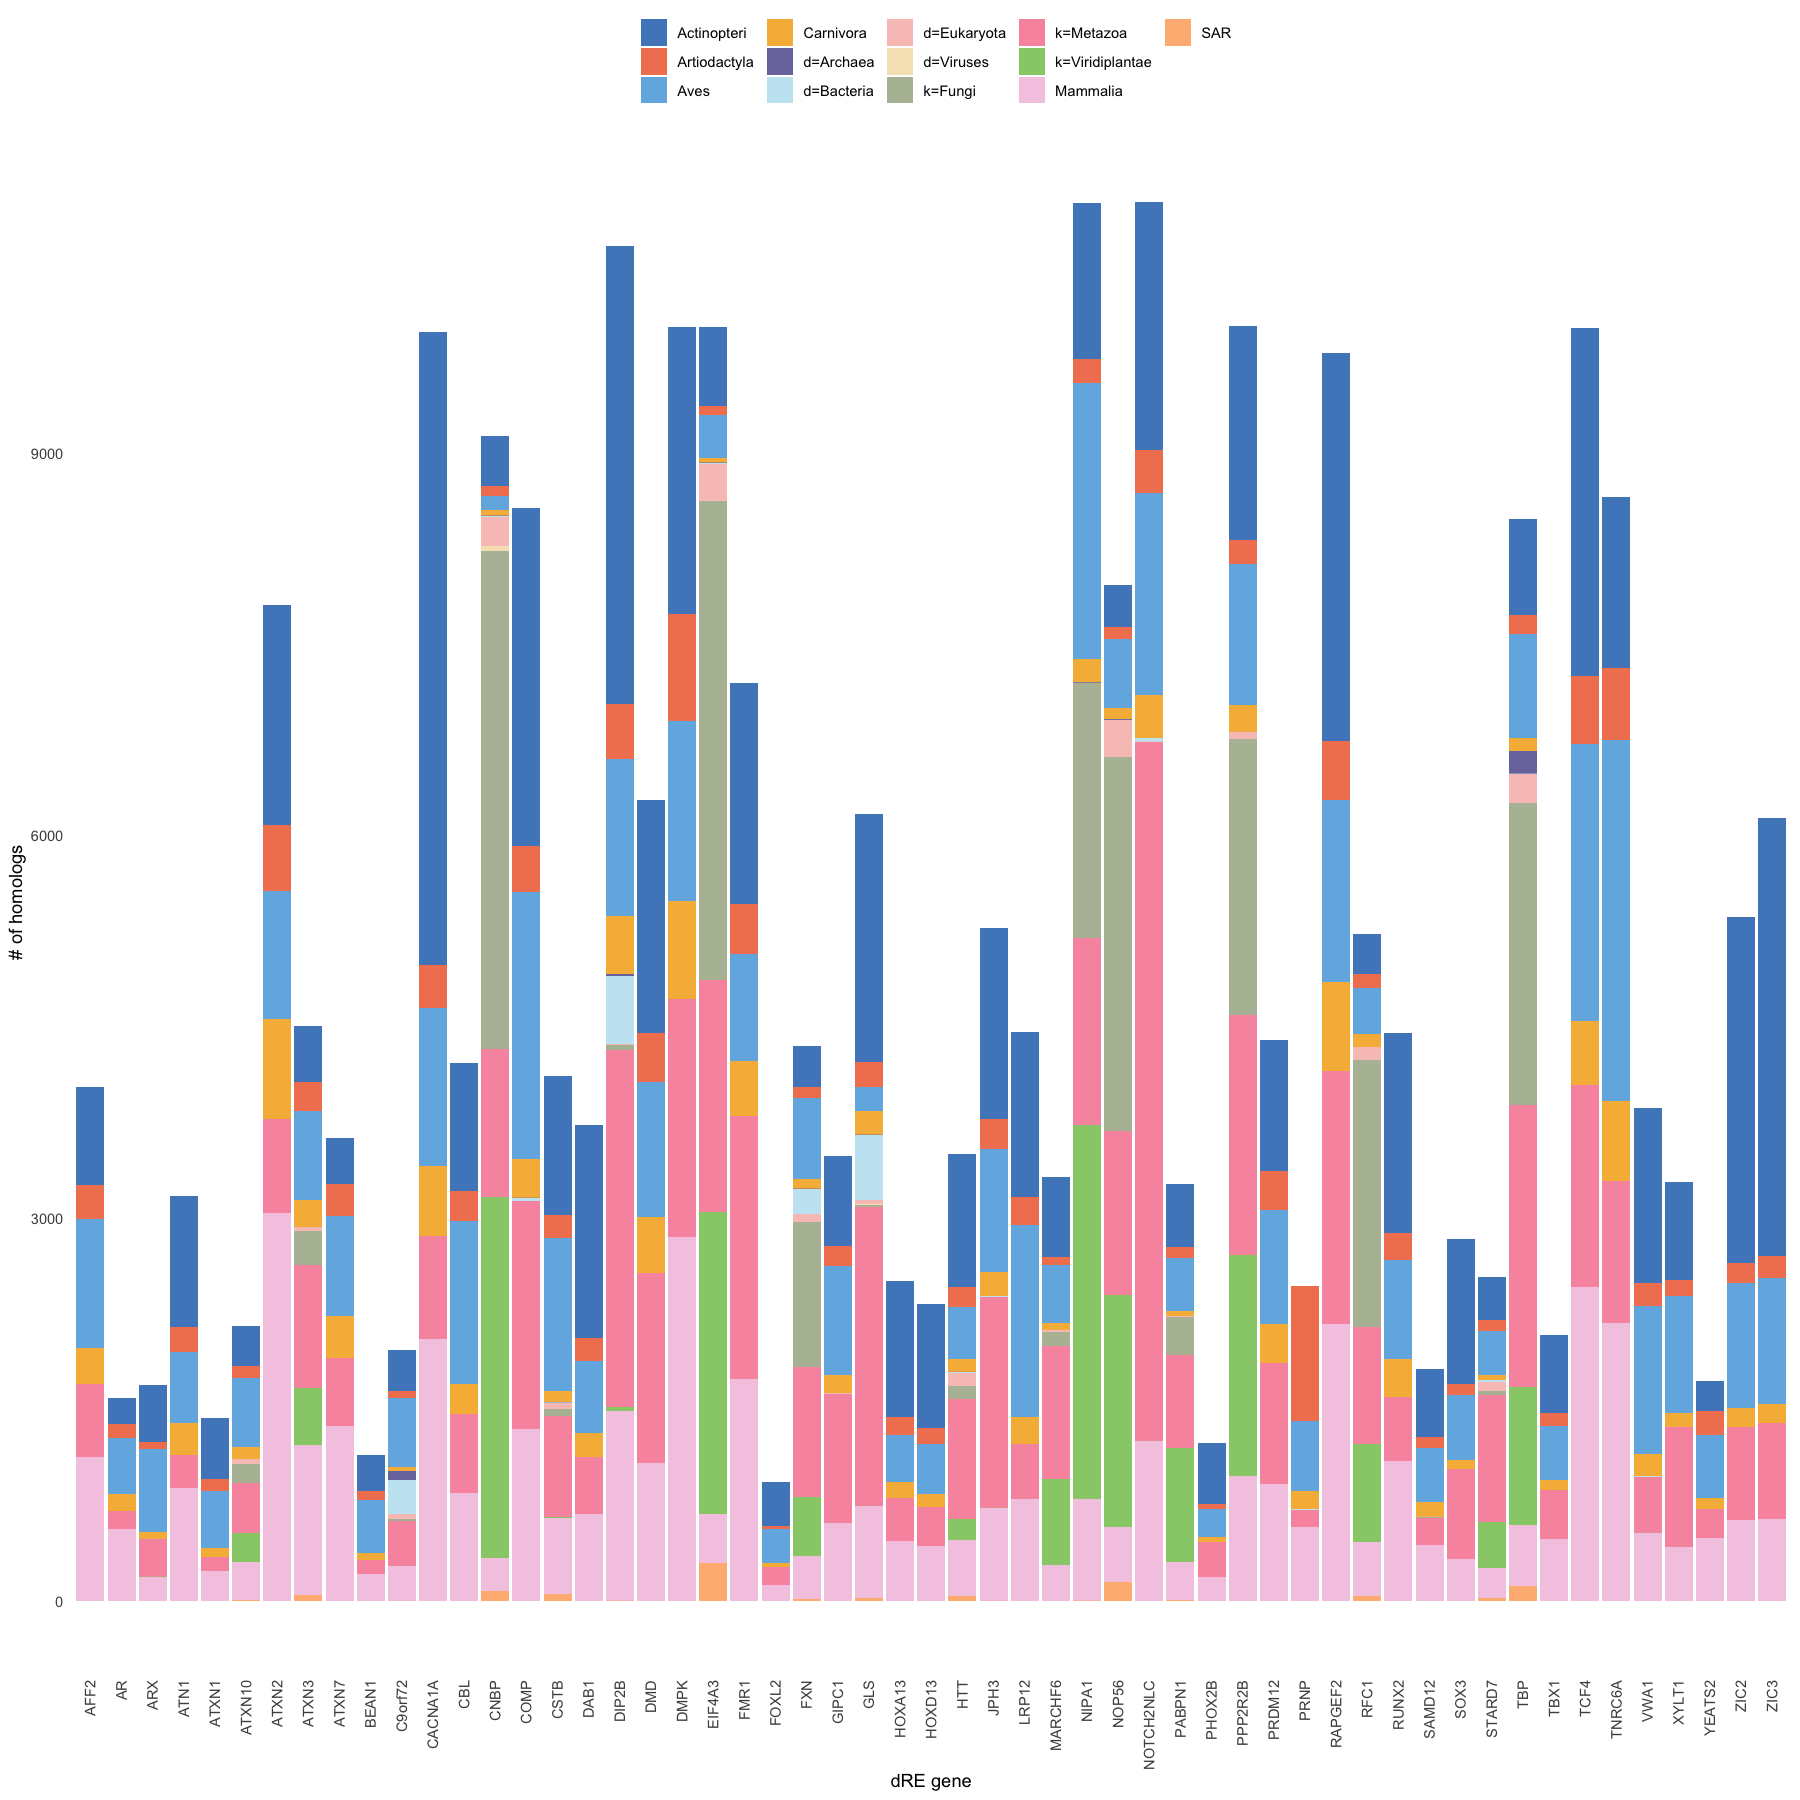

In [9]:
bound <- na.omit(bound, "x")
#pull columns of interest and alphabetical order
plot_df=bound
plot_df <- plot_df[, c("gene", "x")]
plot_df <- plot_df[order(plot_df$gene), ]


#choose colors
color_dict <- c('#5088C5', '#F28360', '#73B5E3'
                , '#F7B846', '#7A77AB', 
                '#C6E7F4', '#F8C5C1','#F5E4BE',
              '#B5BEA4','#F898AE','#97CD78', '#F5CBE4','#FFB984','#97CD78', '#73B5E3')

#plor and choose plot settings
g <- ggplot(data = plot_df, aes(x = gene, fill = x)) +
  geom_bar(position = "stack") +
  coord_cartesian(clip = "off") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        legend.title = element_blank(),
        legend.position = "top",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank()) +
  scale_fill_manual(values = color_dict)

#add axis labels
z=g + labs(x = "dRE gene", y = "# of homologs") +
  guides(fill = guide_legend(title = "Group")) +
  theme(legend.position = "top",
        legend.title.align = 0.5)

options(repr.plot.width = 15, repr.plot.height = 15)

z
# Save the plot to a PDF
ggsave("countofhomologs.pdf", z)

#### Because it is prohibitive to display all individual species observed on a tree, we count up the number of genes for which each taxid is observed and average across the group visualized
(the number of query genes with a homolog per taxonomic group visualized)/(the number of unique taxids within the larger group displayed)=counts shown on tree 

In [85]:
#extract different levels of taxonomy to make a tree. can show more levels than in barchart

extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "k=Metazoa")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=c=)[^;]+")
  }
  
  return(result)
}

# Apply the function to the joined$lineage column
x <- extract_pattern(joined$lineage)


#x = str_extract(joined$lineage, "d=Archaea")
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Archaea"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Fungi"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Metazoa"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Viridiplantae"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Bacteria"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Viruses"), x)
# List of patterns
patterns <- c("p=Apicomplexa","p=Ciliophora","f=Colpodellaceae","o=Colponemida","c=Dinophyceae","g=Loeffela","p=Perkinsozoa","o=Aquavolonida","p=Cercozoa","p=Endomyxa","c=Actinophryidae","c=Bigyra","c=Chrysista","c=Chrysomerophyceae","c=Developea","c=Hyphochytriomycetes","o=Pirsoniales","p=Bacillariophyta","c=Bolidophyceae","c=Chrysophyceae","c=Dictyochophyceae","c=Eustigmatophyceae","c=Olisthodiscophyceae","c=Pelagophyceae","f=Picophagaceae","c=Pinguiophyceae","c=Raphidophyceae","c=Synchromophyceae","c=Synurophyceae")

# Create a regular expression that matches any of the patterns
pattern <- paste(patterns, collapse = "|")

# Extract the pattern from each string
extracted <- str_extract(joined$lineage, pattern)

# If a pattern is extracted, return 'SAR'; otherwise, return the original value
x <- ifelse(!is.na(extracted), "SAR", x)
x
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Eukaryota"), x)
boundmerged=cbind(merged_df,x)
boundmerged



[1] "Mammalia"            "Mammalia"            "Mammalia"           
    [4] "Mammalia"            "Mammalia"            "Mammalia"           
    [7] "Mammalia"            "Mammalia"            "Mammalia"           
   [10] "Mammalia"            "Mammalia"            "Mammalia"           
   [13] "Mammalia"            "Mammalia"            "Mammalia"           
   [16] "Mammalia"            "Mammalia"            "Mammalia"           
   [19] "Mammalia"            "Mammalia"            "Mammalia"           
   [22] "Mammalia"            "Mammalia"            "Mammalia"           
   [25] "Mammalia"            "Mammalia"            "Mammalia"           
   [28] "Mammalia"            "Mammalia"            "Mammalia"           
   [31] "Mammalia"            "Mammalia"            "Mammalia"           
   [34] "Mammalia"            "Mammalia"            "Mammalia"           
   [37] "Mammalia"            "Mammalia"            "Mammalia"           
   [40] "Mammalia"            "Mammalia"            "Mammalia"           
   [43] "Mammalia"            "Mammalia"            "Mammalia"           
   [46] "Mammalia"            "Mammalia"            "Mammalia"           
   [49] "Mammalia"            "Mammalia"            "Mammalia"           
   [52] "Mammalia"            "Mammalia"            "Mammalia"           
   [55] "Mammalia"            "Mammalia"            "Mammalia"           
   [58] "Mammalia"            "Mammalia"            "Mammalia"           
   [61] "Mammalia"            "Mammalia"            "Mammalia"           
   [64] "Mammalia"            "Mammalia"            "Mammalia"           
   [67] "Mammalia"            "Mammalia"            "Mammalia"           
   [70] "Mammalia"            "Mammalia"            "Mammalia"           
   [73] "Mammalia"            "Mammalia"            "Mammalia"           
   [76] "Mammalia"            "Mammalia"            "Mammalia"           
   [79] "Mammalia"            "Mammalia"            "Mammalia"           
   [82] "Mammalia"            "Mammalia"            "Mammalia"           
   [85] "Mammalia"            "Mammalia"            "Mammalia"           
   [88] "Mammalia"            "Mammalia"            "Mammalia"           
   [91] "Mammalia"            "Mammalia"            "Mammalia"           
   [94] "Mammalia"            "Mammalia"            "Mammalia"           
   [97] "Mammalia"            "Mammalia"            "Mammalia"           
  [100] "Mammalia"            "Mammalia"            "Mammalia"           
  [103] "Mammalia"            "Mammalia"            "Mammalia"           
  [106] "Mammalia"            "Mammalia"            "Mammalia"           
  [109] "Mammalia"            "Mammalia"            "Mammalia"           
  [112] "Mammalia"            "Mammalia"            "Mammalia"           
  [115] "Mammalia"            "Mammalia"            "Mammalia"           
  [118] "Mammalia"            "Mammalia"            "Mammalia"           
  [121] "Mammalia"            "Mammalia"            "Mammalia"           
  [124] "Mammalia"            "Mammalia"            "Mammalia"           
  [127] "Mammalia"            "Mammalia"            "Mammalia"           
  [130] "Mammalia"            "Mammalia"            "Mammalia"           
  [133] "Mammalia"            "Mammalia"            "Mammalia"           
  [136] "Mammalia"            "Mammalia"            "Mammalia"           
  [139] "Mammalia"            "Mammalia"            "Mammalia"           
  [142] "Mammalia"            "Mammalia"            "Mammalia"           
  [145] "Mammalia"            "Mammalia"            "Mammalia"           
  [148] "Mammalia"            "Mammalia"            "Mammalia"           
  [151] "Mammalia"            "Mammalia"            "Mammalia"           
  [154] "Mammalia"            "Mammalia"            "Mammalia"           
  [157] "Mammalia"            "Mammalia"            "Mammalia"           
  [160] "Mammalia"            "Mammalia"            "Mammalia"           
  [163] 

id      Accession      gene   x              
1         9606 NP_000135.2    FXN    Mammalia       
2         9606 AAA98508.1     FXN    Mammalia       
3         9598 XP_016816418.1 FXN    Mammalia       
4         9595 XP_004048150.1 FXN    Mammalia       
5         9597 XP_003824802.2 FXN    Mammalia       
6         9590 XP_055150380.1 FXN    Mammalia       
7         9600 XP_054357544.1 FXN    Mammalia       
8        60711 XP_007967621.1 FXN    Mammalia       
9        61622 XP_010361265.1 FXN    Mammalia       
10        9555 XP_003911830.1 FXN    Mammalia       
11        9531 XP_011912045.1 FXN    Mammalia       
12       54180 XP_033093041.1 FXN    Mammalia       
13       61621 XP_017728538.1 FXN    Mammalia       
14        9565 XP_025215796.1 FXN    Mammalia       
15        9544 NP_001247670.1 FXN    Mammalia       
16      591936 XP_023069006.2 FXN    Mammalia       
17        9541 Q8HXX9.2       FXN    Mammalia       
18        9541 BAC20589.1     FXN    Mammalia       
19     2715852 XP_017398922.1 FXN    Mammalia       
20       39432 XP_039317470.1 FXN    Mammalia       
21        9515 XP_032146839.1 FXN    Mammalia       
22       39432 XP_003941591.2 FXN    Mammalia       
23        9483 XP_035158805.1 FXN    Mammalia       
24        9544 EHH24154.1     FXN    Mammalia       
25        9606 5KZ5_A         FXN    Mammalia       
26        9470 XP_053430534.1 FXN    Mammalia       
27       30611 XP_003783094.1 FXN    Mammalia       
28     1230840 XP_007942528.1 FXN    Mammalia       
29        9606 NP_852090.1    FXN    Mammalia       
30        9606 AAA98509.1     FXN    Mammalia       
⋮      ⋮       ⋮              ⋮      ⋮              
286881  419612 S9X9E2         ATXN10 Mammalia       
286882 1156394 T0RI50         ATXN10 d=Eukaryota    
286883   32264 T1JVS2         ATXN10 Arachnida      
286884   32264 T1K8K0         ATXN10 Arachnida      
286885    6087 T2M4A5         ATXN10 Hydrozoa       
286886    8840 U3ISD6         ATXN10 Aves           
286887   59894 U3JJK9         ATXN10 Aves           
286888  225164 V3ZW41         ATXN10 Gastropoda     
286889   72664 V4MJ03         ATXN10 k=Viridiplantae
286890   85681 V4SDK7         ATXN10 k=Viridiplantae
286891    3885 V7BRV4         ATXN10 k=Viridiplantae
286892    3885 V7BUL9         ATXN10 k=Viridiplantae
286893    3885 V7BVY9         ATXN10 k=Viridiplantae
286894    8665 V8NNI1         ATXN10 Lepidosauria   
286895 1317065 V9ECN3         ATXN10 d=Eukaryota    
286896 1317065 V9EDB1         ATXN10 d=Eukaryota    
286897   13333 W1PT42         ATXN10 k=Viridiplantae
286898  871575 W1QEY8         ATXN10 k=Fungi        
286899    4792 W2KFC6         ATXN10 d=Eukaryota    
286900    4792 W2MKU3         ATXN10 d=Eukaryota    
286901  761204 W2PNC2         ATXN10 d=Eukaryota    
286902  761204 W2PP19         ATXN10 d=Eukaryota    
286903 1317064 W2YID2         ATXN10 d=Eukaryota    
286904 1317064 W2YKS1         ATXN10 d=Eukaryota    
286905  112090 W4FJJ6         ATXN10 d=Eukaryota    
286906    7918 W5NK81         ATXN10 Actinopteri    
286907    7998 W5UH68         ATXN10 Actinopteri    
286908 1382522 W6MN89         ATXN10 k=Fungi        
286909 1043628 W7HT01         ATXN10 k=Fungi        
286910  981085 W9R1D0         ATXN10 k=Viridiplantae

In [86]:
#counts per taxid
p=boundmerged%>%
  group_by(id) %>%
  summarise(n_unique_gene = n_distinct(gene))
#pull taxonomic group for each unique taxid
q=boundmerged %>%
  group_by(id) %>%
  summarise(unique_x = unique(x))
#pull tables together with corresponding values
merged_df_full <- merge(p, q, by = "id", all = TRUE)
merged_df_full


#average the homolog counts within the same taxonomic groups (should be a more accurate metric of how many hits each species within that group had)
avg <- aggregate(n_unique_gene ~ unique_x, merged_df_full, mean)
avg


id      n_unique_gene unique_x   
1      41    1             d=Bacteria 
2     166    1             d=Bacteria 
3     205    1             d=Bacteria 
4     262    1             d=Bacteria 
5     263    1             d=Bacteria 
6     286    1             d=Bacteria 
7     294    1             d=Bacteria 
8     337    1             d=Bacteria 
9     384    1             d=Bacteria 
10    463    1             d=Bacteria 
11    488    1             d=Bacteria 
12    536    1             d=Bacteria 
13    562    1             d=Bacteria 
14    571    1             d=Bacteria 
15    621    1             d=Bacteria 
16    648    1             d=Bacteria 
17    654    2             d=Bacteria 
18    662    2             d=Bacteria 
19    666    1             d=Bacteria 
20    674    1             d=Bacteria 
21    675    1             d=Bacteria 
22    780    1             d=Bacteria 
23    781    1             d=Bacteria 
24    853    1             d=Bacteria 
25    885    1             d=Bacteria 
26    954    1             d=Bacteria 
27    971    1             d=Bacteria 
28   1051    1             d=Bacteria 
29   1219    1             d=Bacteria 
30   1236    1             d=Bacteria 
⋮    ⋮       ⋮             ⋮          
8135 2972120  6            k=Fungi    
8136 2972122  3            k=Fungi    
8137 2972123  3            k=Fungi    
8138 2978355  5            k=Fungi    
8139 2978356  6            k=Fungi    
8140 2978357  7            k=Fungi    
8141 2978358  5            k=Fungi    
8142 2978359  5            k=Fungi    
8143 2978360  5            k=Fungi    
8144 2991368 48            k=Metazoa  
8145 2993447  1            d=Bacteria 
8146 2994271  2            Actinopteri
8147 2994473  1            d=Bacteria 
8148 2994555  1            d=Bacteria 
8149 2994821  1            Actinopteri
8150 2995304  1            d=Bacteria 
8151 2995305  1            d=Bacteria 
8152 2995306  1            d=Bacteria 
8153 3003414  7            k=Fungi    
8154 3003415  6            k=Fungi    
8155 3003416  6            k=Fungi    
8156 3003417  5            k=Fungi    
8157 3031751  7            k=Fungi    
8158 3034132 52            Actinopteri
8159 3040453  1            Actinopteri
8160 3040454  1            Actinopteri
8161 3042687  1            d=Bacteria 
8162 3042688  1            d=Bacteria 
8163 3042689  1            d=Bacteria 
8164      NA 16            NA

unique_x            n_unique_gene
1  Actinopteri          7.035097    
2  Amphibia            19.301887    
3  Anthozoa            24.312500    
4  Appendicularia      17.000000    
5  Arachnida           14.200000    
6  Ascidiacea           7.300000    
7  Asteroidea          25.000000    
8  Aves                40.907990    
9  Bivalvia            15.103448    
10 Branchiopoda         4.692308    
11 Calcarea             1.000000    
12 Cephalopoda         13.125000    
13 Cestoda             11.714286    
14 Chilopoda            1.000000    
15 Chondrichthyes      33.000000    
16 Chromadorea         13.028169    
17 Cladistia           35.666667    
18 Clitellata           5.000000    
19 Collembola          21.666667    
20 Crinoidea           32.000000    
21 d=Archaea            1.200000    
22 d=Bacteria           1.095455    
23 d=Eukaryota          4.461929    
24 d=Viruses            1.000000    
25 Demospongiae         5.600000    
26 Diplopoda            1.200000    
27 Echinoidea          10.000000    
28 Enoplea             18.125000    
29 Enteropneusta       11.666667    
30 Eurotatoria         22.090909    
⋮  ⋮                   ⋮            
43 k=Metazoa           32.514286    
44 k=Viridiplantae      8.541401    
45 Lepidosauria        24.888889    
46 Leptocardii         36.333333    
47 Lingulata           34.000000    
48 Malacostraca        14.000000    
49 Mammalia            25.548387    
50 Merostomata         16.000000    
51 Monogenea            4.000000    
52 Myxini               1.666667    
53 Myxozoa              2.333333    
54 Ophiuroidea          1.000000    
55 Ostracoda           18.333333    
56 Palaeacanthocephala  4.500000    
57 Pararotatoria       15.000000    
58 Pauropoda            1.000000    
59 Polychaeta          13.444444    
60 Polyplacophora       1.000000    
61 Priapulimorpha      22.000000    
62 Pycnogonida          3.285714    
63 Remipedia            1.000000    
64 Rhabditophora        6.500000    
65 Rhynchonellata       3.000000    
66 SAR                  2.914894    
67 Symphyla             1.000000    
68 Tentaculata          1.000000    
69 Thecostraca         16.333333    
70 Trematoda           12.714286    
71 Udeonychophora       2.333333    
72 Uniplacotomia       20.000000

### Export result tables to make tree with phyloT and visualize in iTOL

In [151]:
#write result of counts so that it can be used in tree visualization with phyloT
write.csv(avg,"finaltree.csv") #available on Zenodo
#phyloT does not recognize 'SAR' as scientific name, replaced name with taxid 2698737 before uploading to phyloT

### The code above uses the full set of results, but we also wanted to make tree visualizations for some subsets of the results based on the length of the repeats counted in those hits.  The code below uses the same process and logic as above but different inputs and pulls different levels of taxonomy

#### Homolog hits that match or exceed the number of amino acid repeats ever found in healthy humans

In [73]:
#read in count file from blast and format
count=read.csv("taxid_exceeds_healthy_human_max_forEW20230718.csv") #on Zenodo
colnames(count) <- c('id','name','count')

#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% count$id)
joined=left_join(count, lineage, by = "id")   
joined


#pull out the desired lineage information for different taxonomic levels
extract_pattern <- function(string) {
  # Check if string contains c=Mammalia or c=Hyperoartia
  if(str_detect(string, "c=(Mammalia|Hyperoartia)")) {
    # If the pattern exists, extract the desired value
    return(str_extract(string, "(?<=o=)[^;]+"))
  } else {
    # If the pattern doesn't exist, return NA
    return(NA)
  }
}

# Apply the function to the joined$lineage column
x <- sapply(joined$lineage, extract_pattern)
#extract other lineage information
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=c=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=p=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=k=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=d=)[^;]+"), x)

#add this extracted information to the table
bound=cbind(joined[,1:3],x)
bound


#average the homolog counts within the same taxonomic groups (should be a more accurate metric of how many hits each species within that group had)
avg <- aggregate(count ~ x, bound, mean)
avg


#write result of counts so that it can be used in tree visualization with phyloT
write.csv(avg,"ndREhitsav_exceeds_special.csv") #on Zenodo

id      name                            count
1     9261  Australian echidna              5    
2    38775  yellow-footed antechinus        4    
3    33562  monito del monte                4    
4     9305  Tasmanian devil                 4    
5     9337  common brushtail                4    
6     7757  sea lamprey                     3    
7    38626  koala                           3    
8    29139  common wombat                   3    
9     9662  Eurasian badger                 3    
10   59472  Kuhl's pipistrelle              3    
11   13616  gray short-tailed opossum       3    
12   36803  cinereus shrew                  3    
13  191870  Agile Gracile Mouse Opossum     3    
14  214514  Pacific pocket mouse            3    
15    9258  platypus                        2    
16    8957  Northern goshawk                2    
17  132908  large flying fox                2    
18   29073  polar bear                      2    
19    9407  Egyptian rousette               2    
20    9615  dog                             2    
21    9644  brown bear                      2    
22    9657  Eurasian river otter            2    
23    9669  domestic ferret                 2    
24  143292  Chinese pangolin                2    
25   10181  naked mole-rat                  2    
26  109475  white-toothed pygmy shrew       2    
27  109478  Brandt's bat                    2    
28    9796  horse                           2    
29   76717  Northern American river otter   2    
30   30640  gray squirrel                   2    
⋮   ⋮       ⋮                               ⋮    
251   12930 blue-fronted amazon             1    
252    9720 harbor seal                     1    
253    9731 long-finned pilot whale         1    
254    9798 Przewalski's horse              1    
255    9823 pig                             1    
256    9886 Reeves' muntjac                 1    
257    9974 Malayan pangolin                1    
258    9999 Arctic ground squirrel          1    
259   10047 Mongolian gerbil                1    
260   10089 Ryukyu mouse                    1    
261   10090 house mouse                     1    
262   10093 shrew mouse                     1    
263   10129 European woodmouse              1    
264   10141 domestic guinea pig             1    
265   13013 North African catfish           1    
266   30455 Northern fulmar                 1    
267   13146 budgerigar                      1    
268   13746 common murre                    1    
269   27622 Pallas's mastiff bat            1    
270   27675 southern two-toed sloth         1    
271   28689 Razorbill                       1    
272   28737 Cape elephant shrew             1    
273   29064 snow leopard                    1    
274   29082 short-eared elephant shrew      1    
275   29088 Hawaiian monk seal              1    
276   29144 milkfish                        1    
277   29158 Mediterranean mussel            1    
278   29159 Pacific oyster                  1    
279   30388 southern screamer               1    
280 2715852 Panamanian white-faced capuchin 1    
    lineage                                                                                                                                                       
1   name=Tachyglossus aculeatus; g=Tachyglossus; f=Tachyglossidae; o=Monotremata; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                  
2   name=Antechinus flavipes; g=Antechinus; f=Dasyuridae; o=Dasyuromorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                        
3   name=Dromiciops gliroides; g=Dromiciops; f=Microbiotheriidae; o=Microbiotheria; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                
4   name=Sarcophilus harrisii; g=Sarcophilus; f=Dasyuridae; o=Dasyuromorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                      
5   name=Trichosurus vulpecula; g=Trichosurus; f=Phalangeridae; o=Diprotodontia; c=Mammal

id      name                            count x                 
1     9261  Australian echidna              5     Monotremata       
2    38775  yellow-footed antechinus        4     Dasyuromorphia    
3    33562  monito del monte                4     Microbiotheria    
4     9305  Tasmanian devil                 4     Dasyuromorphia    
5     9337  common brushtail                4     Diprotodontia     
6     7757  sea lamprey                     3     Petromyzontiformes
7    38626  koala                           3     Diprotodontia     
8    29139  common wombat                   3     Diprotodontia     
9     9662  Eurasian badger                 3     Carnivora         
10   59472  Kuhl's pipistrelle              3     Chiroptera        
11   13616  gray short-tailed opossum       3     Didelphimorphia   
12   36803  cinereus shrew                  3     Eulipotyphla      
13  191870  Agile Gracile Mouse Opossum     3     Didelphimorphia   
14  214514  Pacific pocket mouse            3     Rodentia          
15    9258  platypus                        2     Monotremata       
16    8957  Northern goshawk                2     Aves              
17  132908  large flying fox                2     Chiroptera        
18   29073  polar bear                      2     Carnivora         
19    9407  Egyptian rousette               2     Chiroptera        
20    9615  dog                             2     Carnivora         
21    9644  brown bear                      2     Carnivora         
22    9657  Eurasian river otter            2     Carnivora         
23    9669  domestic ferret                 2     Carnivora         
24  143292  Chinese pangolin                2     Pholidota         
25   10181  naked mole-rat                  2     Rodentia          
26  109475  white-toothed pygmy shrew       2     Eulipotyphla      
27  109478  Brandt's bat                    2     Chiroptera        
28    9796  horse                           2     Perissodactyla    
29   76717  Northern American river otter   2     Carnivora         
30   30640  gray squirrel                   2     Rodentia          
⋮   ⋮       ⋮                               ⋮     ⋮                 
251   12930 blue-fronted amazon             1     Aves              
252    9720 harbor seal                     1     Carnivora         
253    9731 long-finned pilot whale         1     Artiodactyla      
254    9798 Przewalski's horse              1     Perissodactyla    
255    9823 pig                             1     Artiodactyla      
256    9886 Reeves' muntjac                 1     Artiodactyla      
257    9974 Malayan pangolin                1     Pholidota         
258    9999 Arctic ground squirrel          1     Rodentia          
259   10047 Mongolian gerbil                1     Rodentia          
260   10089 Ryukyu mouse                    1     Rodentia          
261   10090 house mouse                     1     Rodentia          
262   10093 shrew mouse                     1     Rodentia          
263   10129 European woodmouse              1     Rodentia          
264   10141 domestic guinea pig             1     Rodentia          
265   13013 North African catfish           1     Actinopteri       
266   30455 Northern fulmar                 1     Aves              
267   13146 budgerigar                      1     Aves              
268   13746 common murre                    1     Aves              
269   27622 Pallas's mastiff bat            1     Chiroptera        
270   27675 southern two-toed sloth         1     Pilosa            
271   28689 Razorbill                       1     Aves              
272   28737 Cape elephant shrew             1     Macroscelidea     
273   29064 snow leopard                    1     Carnivora         
274   29082 short-eared elephant shrew      1     Macroscelidea     
275   29088 Hawaiian monk seal              1     Carnivora         
276   29144 milkfish                        1     Actinopteri       
27

x                  count   
1  Actinopteri        1.000000
2  Anthozoa           1.000000
3  Arachnida          1.000000
4  Artiodactyla       1.000000
5  Asteroidea         1.000000
6  Aves               1.020202
7  Bivalvia           1.000000
8  Carnivora          1.357143
9  Chiroptera         1.750000
10 Chondrichthyes     1.000000
11 Dasyuromorphia     4.000000
12 Didelphimorphia    3.000000
13 Diprotodontia      2.400000
14 Echinoidea         1.000000
15 Eulipotyphla       2.333333
16 Lagomorpha         1.000000
17 Lepidosauria       1.111111
18 Leptocardii        1.000000
19 Macroscelidea      1.000000
20 Microbiotheria     4.000000
21 Monotremata        3.500000
22 Perissodactyla     1.500000
23 Petromyzontiformes 3.000000
24 Pholidota          1.500000
25 Pilosa             1.000000
26 Primates           1.100000
27 Rodentia           1.277778

#### Homolog hits that match or exceed the number of amino acid repeats found in the human refseq protein

In [74]:
#read in count file from blast and format
count=read.csv("~/Downloads/taxid_ndREhits_forEW20230718.csv") #available on Zenodo
colnames(count) <- c('id','name','count')

#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% count$id)
joined=left_join(count, lineage, by = "id")   
joined


#pull out the desired lineage information for different taxonomic levels
extract_pattern <- function(string) {
  # Check if string contains c=Mammalia or c=Hyperoartia
  if(str_detect(string, "c=(Mammalia|Hyperoartia)")) {
    # If the pattern exists, extract the desired value
    return(str_extract(string, "(?<=o=)[^;]+"))
  } else {
    # If the pattern doesn't exist, return NA
    return(NA)
  }
}

# Apply the function to the joined$lineage column
x <- sapply(joined$lineage, extract_pattern)
#extract other lineage information
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=c=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=p=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=k=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=d=)[^;]+"), x)

#add this extracted information to the table
bound=cbind(joined[,1:3],x)
bound


#average the homolog counts within the same taxonomic groups (should be a more accurate metric of how many hits each species within that group had)
avg <- aggregate(count ~ x, bound, mean)
avg


#write result of counts so that it can be used in tree visualization with phyloT
write.csv(avg,"ndREhitsav_matches_special.csv") #on zenodo


id     name                          count
1     42254 European shrew                13   
2     10041 white-footed mouse            13   
3     36803 cinereus shrew                12   
4    105255 banner-tailed kangaroo rat    12   
5    109475 white-toothed pygmy shrew     12   
6     60711 green monkey                  12   
7      9597 pygmy chimpanzee              12   
8    591936 Ugandan red Colobus           11   
9     51337 lesser Egyptian jerboa        11   
10    59472 Kuhl's pipistrelle            11   
11     9601 Sumatran orangutan            11   
12     9999 Arctic ground squirrel        11   
13    30640 gray squirrel                 11   
14     9598 chimpanzee                    10   
15    10129 European woodmouse            10   
16     9541 crab-eating macaque           10   
17    10116 Norway rat                    10   
18   286419 dingo                         10   
19     9483 white-tufted-ear marmoset     10   
20    29078 big brown bat                 10   
21     9986 rabbit                        10   
22   214514 Pacific pocket mouse          10   
23     9925 goat                          10   
24   130825 black-lipped pika             10   
25    51338 American beaver                9   
26     9694 tiger                          9   
27    27622 Pallas's mastiff bat           9   
28     9544 Rhesus monkey                  9   
29     9615 dog                            9   
30     9644 brown bear                     9   
⋮    ⋮      ⋮                             ⋮    
1094 73109  Amami-oshima island spiny rat 1    
1095  9595  Western lowland gorilla       1    
1096  9545  Pig-tailed macaque            1    
1097  9544  Rhesus macaque                1    
1098  9209  Great cormorant               1    
1099  9083  Chinese bamboo-partridge      1    
1100  9132  Australian magpie             1    
1101 99882  California thrasher           1    
1102 98964  northern cardinal             1    
1103 98144  white-throated Oxylabes       1    
1104 96939  riverbank grape               1    
1105 95602  Chinese mitten crab           1    
1106  9163  hooded pitta                  1    
1107 94439  tailess tenrec                1    
1108 94128  Oriental honeybee             1    
1109  9176  chestnut-crowned babbler      1    
1110  9209  great cormorant               1    
1111  9531  Sooty mangabey                1    
1112 92688  Erect-crested penguin         1    
1113 92683  jackass penguin               1    
1114 91767  red-headed barbet             1    
1115 90675  false flax                    1    
1116 90382  Heck's macaque                1    
1117  9252  Pied-billed grebe             1    
1118  9315  tammar wallaby                1    
1119 89379  Malagasy giant rat            1    
1120 88217  Carniolan honeybee            1    
1121 85310  southern green stink bug      1    
1122  9400  Indian short-nosed fruit bat  1    
1123  2711  sweet orange                  1    
     lineage                                                                                                                                                       
1    name=Sorex araneus; g=Sorex; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                      
2    name=Peromyscus leucopus; g=Peromyscus; f=Cricetidae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                              
3    name=Sorex cinereus; g=Sorex; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                     
4    name=Dipodomys spectabilis; g=Dipodomys; f=Heteromyidae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                           
5    name=Suncus etruscus; g=Suncus; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                   
6    name=Chlorocebus sabaeus; g=Chlorocebus;

id     name                          count x            
1     42254 European shrew                13    Eulipotyphla 
2     10041 white-footed mouse            13    Rodentia     
3     36803 cinereus shrew                12    Eulipotyphla 
4    105255 banner-tailed kangaroo rat    12    Rodentia     
5    109475 white-toothed pygmy shrew     12    Eulipotyphla 
6     60711 green monkey                  12    Primates     
7      9597 pygmy chimpanzee              12    Primates     
8    591936 Ugandan red Colobus           11    Primates     
9     51337 lesser Egyptian jerboa        11    Rodentia     
10    59472 Kuhl's pipistrelle            11    Chiroptera   
11     9601 Sumatran orangutan            11    Primates     
12     9999 Arctic ground squirrel        11    Rodentia     
13    30640 gray squirrel                 11    Rodentia     
14     9598 chimpanzee                    10    Primates     
15    10129 European woodmouse            10    Rodentia     
16     9541 crab-eating macaque           10    Primates     
17    10116 Norway rat                    10    Rodentia     
18   286419 dingo                         10    Carnivora    
19     9483 white-tufted-ear marmoset     10    Primates     
20    29078 big brown bat                 10    Chiroptera   
21     9986 rabbit                        10    Lagomorpha   
22   214514 Pacific pocket mouse          10    Rodentia     
23     9925 goat                          10    Artiodactyla 
24   130825 black-lipped pika             10    Lagomorpha   
25    51338 American beaver                9    Rodentia     
26     9694 tiger                          9    Carnivora    
27    27622 Pallas's mastiff bat           9    Chiroptera   
28     9544 Rhesus monkey                  9    Primates     
29     9615 dog                            9    Carnivora    
30     9644 brown bear                     9    Carnivora    
⋮    ⋮      ⋮                             ⋮     ⋮            
1094 73109  Amami-oshima island spiny rat 1     Rodentia     
1095  9595  Western lowland gorilla       1     Primates     
1096  9545  Pig-tailed macaque            1     Primates     
1097  9544  Rhesus macaque                1     Primates     
1098  9209  Great cormorant               1     Aves         
1099  9083  Chinese bamboo-partridge      1     Aves         
1100  9132  Australian magpie             1     Aves         
1101 99882  California thrasher           1     Aves         
1102 98964  northern cardinal             1     Aves         
1103 98144  white-throated Oxylabes       1     Aves         
1104 96939  riverbank grape               1     Magnoliopsida
1105 95602  Chinese mitten crab           1     Malacostraca 
1106  9163  hooded pitta                  1     Aves         
1107 94439  tailess tenrec                1     Mammalia     
1108 94128  Oriental honeybee             1     Insecta      
1109  9176  chestnut-crowned babbler      1     Aves         
1110  9209  great cormorant               1     Aves         
1111  9531  Sooty mangabey                1     Primates     
1112 92688  Erect-crested penguin         1     Aves         
1113 92683  jackass penguin               1     Aves         
1114 91767  red-headed barbet             1     Aves         
1115 90675  false flax                    1     Magnoliopsida
1116 90382  Heck's macaque                1     Primates     
1117  9252  Pied-billed grebe             1     Aves         
1118  9315  tammar wallaby                1     Diprotodontia
1119 89379  Malagasy giant rat            1     Rodentia     
1120 88217  Carniolan honeybee            1     Insecta      
1121 85310  southern green stink bug      1     Insecta      
1122  9400  Indian short-nosed fruit bat  1     Chiroptera   
1123  2711  sweet orange                  1     Magnoliopsida

x                     count   
1  Actinopteri           2.046243
2  Agaricomycetes        1.000000
3  Amphibia              1.937500
4  Anthozoa              2.000000
5  Arachnida             1.647059
6  Artiodactyla          4.204545
7  Ascidiacea            2.000000
8  Asteroidea            2.000000
9  Aves                  1.638298
10 Bivalvia              1.800000
11 Branchiopoda          3.000000
12 Carnivora             5.043478
13 Cephalopoda           1.333333
14 Chilopoda             1.000000
15 Chiroptera            6.277778
16 Chondrichthyes        1.909091
17 Chordata              1.857143
18 Chromadorea           1.210526
19 Cingulata             5.000000
20 Cladistia             3.000000
21 Dasyuromorphia        7.500000
22 Dermoptera            4.000000
23 Didelphimorphia       7.000000
24 Diprotodontia         5.200000
25 Dothideomycetes       1.000000
26 Echinoidea            2.000000
27 Eulipotyphla          9.000000
28 Eurotatoria           1.000000
29 Exobasidiomycetes     1.000000
30 Gastropoda            1.666667
31 Hexanauplia           2.000000
32 Holothuroidea         1.500000
33 Hydrozoa              2.000000
34 Insecta               1.684848
35 Lagomorpha            8.333333
36 Lepidosauria          2.500000
37 Leptocardii           2.000000
38 Macroscelidea         2.000000
39 Magnoliopsida         1.000000
40 Malacostraca          1.111111
41 Mammalia              2.166667
42 Marchantiopsida       1.000000
43 Merostomata           1.000000
44 Microbiotheria        7.000000
45 Monotremata           6.000000
46 Perissodactyla        4.000000
47 Petromyzontiformes    7.000000
48 Pezizomycetes         1.000000
49 Pholidota             7.000000
50 Pilosa                8.000000
51 Pinopsida             1.000000
52 Polychaeta            1.000000
53 Primates              5.850000
54 Proboscidea           1.500000
55 Rodentia              5.620000
56 Scandentia            2.000000
57 Schizosaccharomycetes 1.000000
58 Sirenia               5.000000
59 Trematoda             1.500000

In [10]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/emilycpweiss/miniconda3/envs/jupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.2 forcats_1.0.0   stringr_1.5.0   dplyr_1.1.2    
 [5] purrr_1.0.1     readr_2.1.4     tidyr_1.3.0     tibble_3.2.1   
 [9] ggplot2_3.4.1   tidyverse_2.0.0 magrittr_2.0.3 

loaded via a namespace (and not attached):
 [1] pillar_1.9.0      compiler_4.2.2    base64enc_0.1-3   tools_4.2.2      
 [5] bit_4.0.5         digest_0.6.31     uuid_1.1-0        timechange_0.2.0 
 [9] jsonlite_1.8.7    evaluate_0.20     lifecycle_1.0.3   gtable_0.3.1     
[13] pkgconfig_2.0.3   rlang_1.1.1       IRdisplay_1.1     cli_3.6.0        
[17] parallel_4.2.2    IRkerne